## Activity Recognition using Machine Learning

### Import libraries
I import numpy and pandas for managing arrays and dataset. Then, matplotlib is included to be used to create visualisations. To use various machine learning algorithms, I import SVM, Logistic Regression, K Nearest Neighbors Classifier and Random Forest Classifier from sklearn. Also, included is accuracy_score to calculate accuracy.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

C:\Users\tbresee\AppData\Roaming\Python\Python38\site-packages\mpl_toolkits\mplot3d\__init__.py:1: MatplotlibDeprecationWarning: 
The deprecated function was deprecated in Matplotlib 3.4 and will be removed two minor releases later.
  from .axes3d import Axes3D


## Understand the data

In [2]:
training_data = pd.read_csv('train.csv')
testing_data = pd.read_csv('test.csv')

In [3]:
training_data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [4]:
print("Training Data: {}".format(training_data.shape))

Training Data: (7352, 563)


In [5]:
print("Null values present in training data: {}".format(training_data.isnull().values.any()))

Null values present in training data: False


In [6]:
print("Testing Data: {}".format(testing_data.shape))

Testing Data: (2947, 563)


In [7]:
print("Null values present in testing data: {}".format(testing_data.isnull().values.any()))

Null values present in testing data: False


There are total 7352 records in the training dataset. Further, there are no null values in the dataset.The testing dataset has 2947 records for testing our models. This dataset has no null values.

I can see that the dataset consists of accelerometer and gyroscope sensor values for each record. Further, the last two columns are `subject` which refers to subject number and `Activity` which defines the type of activity. The `Activity` column acts as the label `y` and all the rest columns are features `X`. 

In [8]:
# Get X and y for training data
X_train = training_data.drop(columns = ['Activity', 'subject'])
y_train = training_data["Activity"]

# Get X and y for testing data
y_test = testing_data['Activity']
X_test = testing_data.drop(columns = ['Activity', 'subject'])

## Visualize the dataset

I will now visualise the training data to get a better understanding of the available dataset.

In [9]:
count_of_each_activity = np.array(y_train.value_counts())

In [10]:
activities = sorted(y_train.unique())

(array([   0.,  200.,  400.,  600.,  800., 1000., 1200., 1400., 1600.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

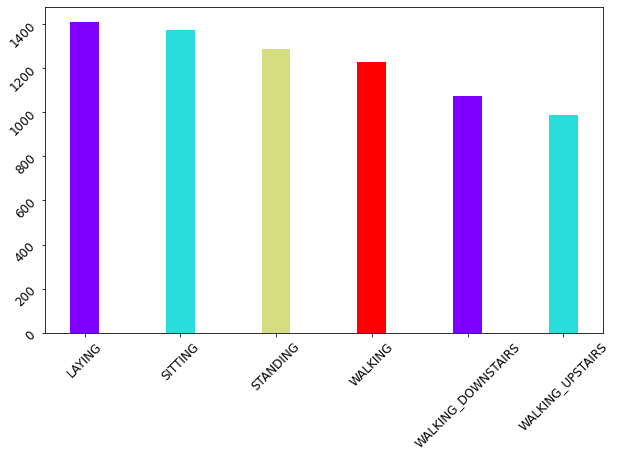

In [11]:
colors = cm.rainbow(np.linspace(0, 1, 4))
plt.figure(figsize=(10,6))
plt.bar(activities,count_of_each_activity,width=0.3,color=colors)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(rotation=45,fontsize=12)

([<matplotlib.patches.Wedge at 0x1edb337cbe0>,
 [Text(0.9071064061014833, 0.6222201925441275, 'LAYING'),
  Text(-0.23874635466468208, 1.073778458591122, 'SITTING'),
  Text(-1.0745883152841482, 0.2350743555872831, 'STANDING'),
  Text(-0.7193129027755119, -0.832219290752544, 'WALKING'),
  Text(0.29301586483507763, -1.0602554894717366, 'WALKING_DOWNSTAIRS'),
  Text(1.0038008332903794, -0.4498709671511826, 'WALKING_UPSTAIRS')],
 [Text(0.4947853124189908, 0.3393928322967968, '19.14'),
  Text(-0.13022528436255384, 0.5856973410497028, '18.69'),
  Text(-0.5861390810640807, 0.12822237577488166, '17.49'),
  Text(-0.3923524924230064, -0.453937794955933, '16.68'),
  Text(0.15982683536458778, -0.5783211760754926, '14.59'),
  Text(0.5475277272492978, -0.24538416390064502, '13.41')])

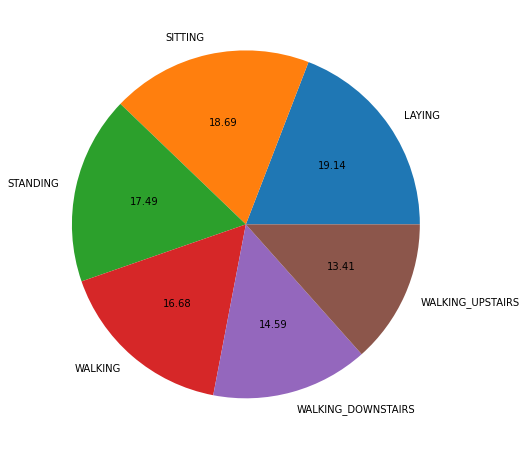

In [12]:
plt.figure(figsize=(16,8))
plt.pie(count_of_each_activity, labels = activities, autopct = '%0.2f')

The percenage values show that the data size for each activity is comparable. The dataset is equally distributed.

On inspecting the dataset, I can see that there are many features. It's easy to identify that there are Accelerometer, Gyroscope and some other values in the dataset. I can check the share of each by plotting a bar graph of each type. Accelerometer values have Acc in them, Gyroscope values have Gyro and rest can be considered as others

In [13]:
Acc = 0
Gyro = 0
other = 0

for value in X_train.columns:
    if "Acc" in str(value):
        Acc += 1
    elif "Gyro" in str(value):
        Gyro += 1
    else:
        other += 1

<BarContainer object of 3 artists>

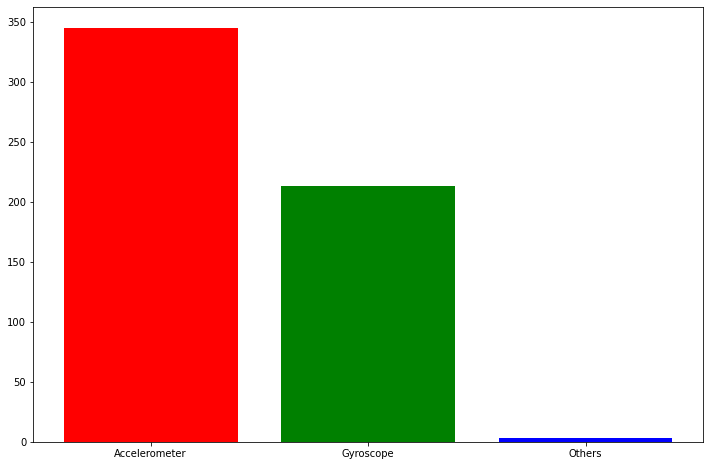

In [14]:
plt.figure(figsize=(12,8))
plt.bar(['Accelerometer', 'Gyroscope', 'Others'],[Acc,Gyro,other],color=('r','g','b'))

Accelerometer constitutes the maximum features, followed by Gyroscope. Other features are very less

In [15]:
training_data['subject'].unique()

array([ 1,  3,  5,  6,  7,  8, 11, 14, 15, 16, 17, 19, 21, 22, 23, 25, 26,
       27, 28, 29, 30], dtype=int64)

I will select all rows from the dataset that have the ‘Activity’ label as ‘STANDING’ and store it in standing_activity. 

In [16]:
standing_activity = training_data[training_data['Activity'] == 'STANDING']
# Reset the index for this dataframe
standing_activity = standing_activity.reset_index(drop=True)

In [17]:
standing_activity.shape

(1374, 563)

### Set time series for each subject

In [18]:
time = 1
index = 0
time_series = np.zeros(standing_activity.shape[0])
print(time_series)

[0. 0. 0. ... 0. 0. 0.]


The data collected is in continuous time series for each individual and was recorded at the `same rate`. So, I can simply assign time values to each activity starting from `0` each time the subject changes. For each subject, the `Standing activity` records will start with a time value of 0 and increment by `1` till the previous row’s subject matches the present row’s subject. I store all the time series in a variable `time_series` and convert it into a dataframe using pandas method DataFrame() and store it in a variable `time_series_df`. Lastly, I combine the records and the time series variable together in `standing_activity_d`f using pandas `concatenate()` method. 

In [19]:
for row_number in range(standing_activity.shape[0]):
    if (row_number == 0 
        or standing_activity.iloc[row_number]['subject'] == standing_activity.iloc[row_number - 1]['subject']):
        time_series[index] = time
        time += 1
    else:
        time_series[index] = 1
        time = 2
    index += 1

# Combine the time_series with the standing_activity dataframe
time_series_df = pd.DataFrame({ 'Time': time_series })
standing_activity_df = pd.concat([standing_activity, time_series_df], axis = 1)

In [20]:
standing_activity_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,Time
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING,1.0
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING,2.0
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING,3.0
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING,4.0
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING,5.0


For each subject, I can now plot the graph of their angles with time. I use the cm subpackage of matplotlib to get a set of colors which shall be used for differentiating subjects.

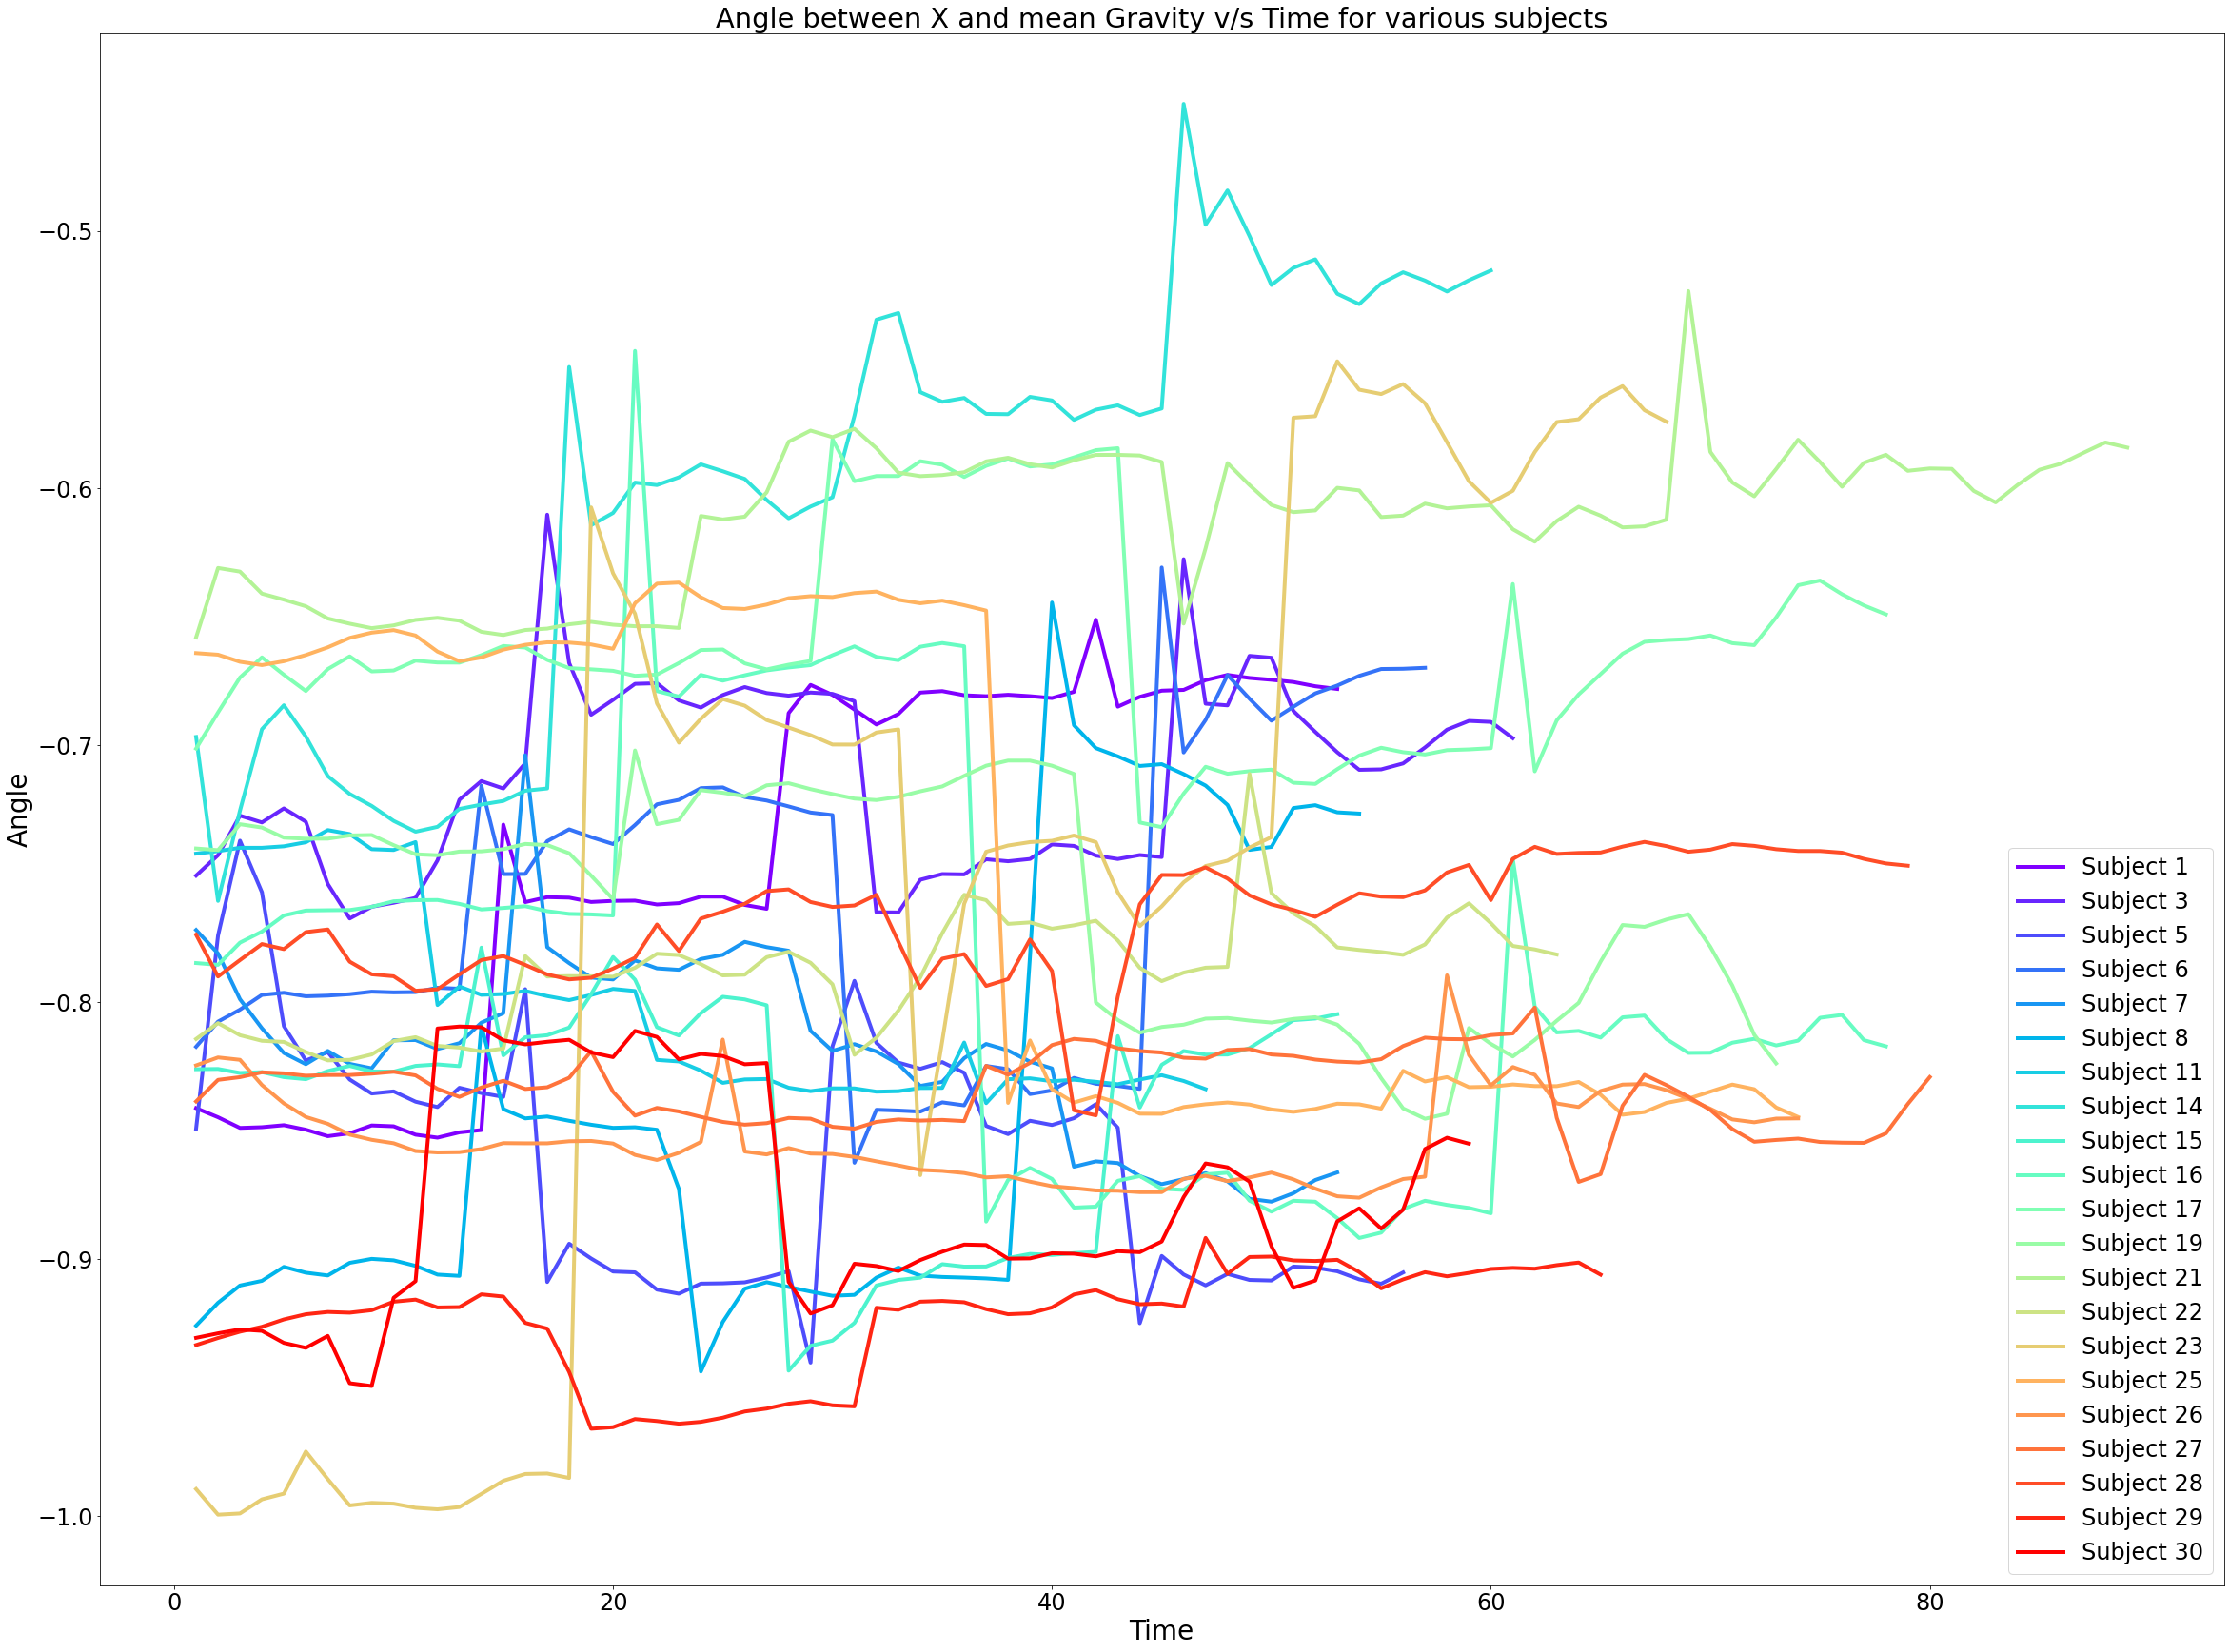

In [21]:
colors = cm.rainbow(np.linspace(0, 1, len(standing_activity_df['subject'].unique())))

# Create plot for each subject, which will all be displayed overlapping on one plot
id = 0
for subject in standing_activity_df['subject'].unique():
    plt.rcParams.update({'figure.figsize': [40, 30], 'font.size': 24})
    plt.plot(standing_activity_df[standing_activity_df['subject'] == subject]['Time'], 
             standing_activity_df[standing_activity_df['subject'] == subject]['angle(X,gravityMean)'],
             c = colors[id], 
             label = 'Subject ' + str(subject),
             linewidth = 4)
    plt.xlabel('Time',fontsize=28)
    plt.ylabel('Angle',fontsize=28)
    plt.title('Angle between X and mean Gravity v/s Time for various subjects')
    plt.legend(prop = {'size': 24})
    id += 1

If I take a closer look at the graph, we can see that each line on an average, transitions between a maximum range of 0.2–0.3 values. This is indeed the expected behaviour as slight variations can be attributed to minor human errors.

## Classify activities

To begin, I'll use various machine learning algorithms available inside the sklearn package that I have already imported. For each algorithm, I'll calculate the accuracy of prediction and identify the most accurate algorithm.

For now, I will keep the default values of parameters as defined in `sklearn` for each classifier.

In [22]:
accuracy_scores = np.zeros(4)

# Support Vector Classifier
clf = SVC().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[0] = accuracy_score(y_test, prediction)*100
print('Support Vector Classifier accuracy: {}%'.format(accuracy_scores[0]))

# Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[1] = accuracy_score(y_test, prediction)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_scores[1]))

# K Nearest Neighbors
clf = KNeighborsClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[2] = accuracy_score(y_test, prediction)*100
print('K Nearest Neighbors Classifier accuracy: {}%'.format(accuracy_scores[2]))

# Random Forest
clf = RandomForestClassifier().fit(X_train, y_train)
prediction = clf.predict(X_test)
accuracy_scores[3] = accuracy_score(y_test, prediction)*100
print('Random Forest Classifier accuracy: {}%'.format(accuracy_scores[3]))

Support Vector Classifier accuracy: 95.04580929759076%


C:\Users\tbresee\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 95.79233118425518%
K Nearest Neighbors Classifier accuracy: 90.02375296912113%
Random Forest Classifier accuracy: 92.80624363759755%


plotting a bar graph of the accuracies to compare them visually.


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

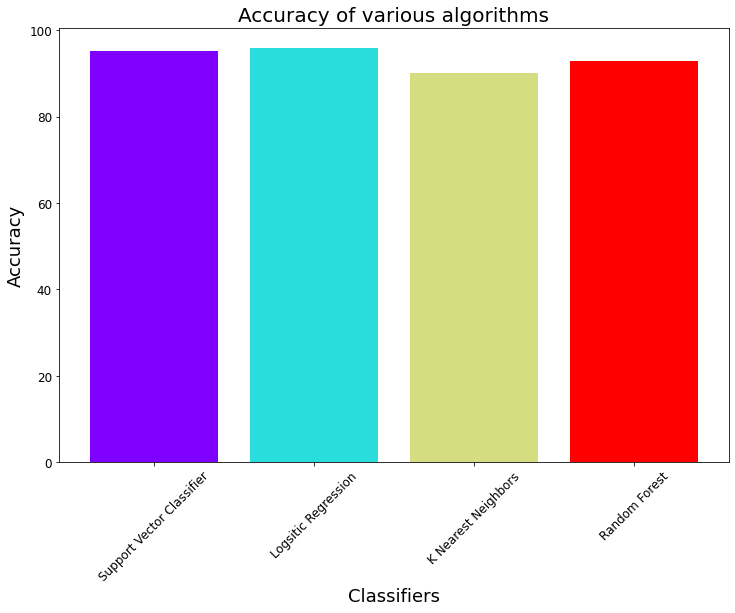

In [23]:
plt.figure(figsize=(12,8))
colors = cm.rainbow(np.linspace(0, 1, 4))
labels = ['Support Vector Classifier', 'Logsitic Regression', 'K Nearest Neighbors', 'Random Forest']
plt.bar(labels,
        accuracy_scores,
        color = colors)
plt.xlabel('Classifiers',fontsize=18)
plt.ylabel('Accuracy',fontsize=18)
plt.title('Accuracy of various algorithms',fontsize=20)
plt.xticks(rotation=45,fontsize=12)
plt.yticks(fontsize=12)

Clearly seen that `Logistic Regression` performed the best with the highest accuracy.

## Conclusion

In this particular project, I explored the activity recognition dataset. I visualized the data using matplotlib. Then, I applied numerous machine learning algorithms and found out that `Logistic Regression` performed the best in classifying different activities with accuracy of almost 96%